# Task 1 - Exploratory Data Analysis


---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing the dependencies

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [ ]:
import pandas as pd

---

## Section 2 - Data loading



In [ ]:
path = "/content/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics



In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


---

## Section 4 - Visualisation


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

To analyse the dataset, Helper functions have been built. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

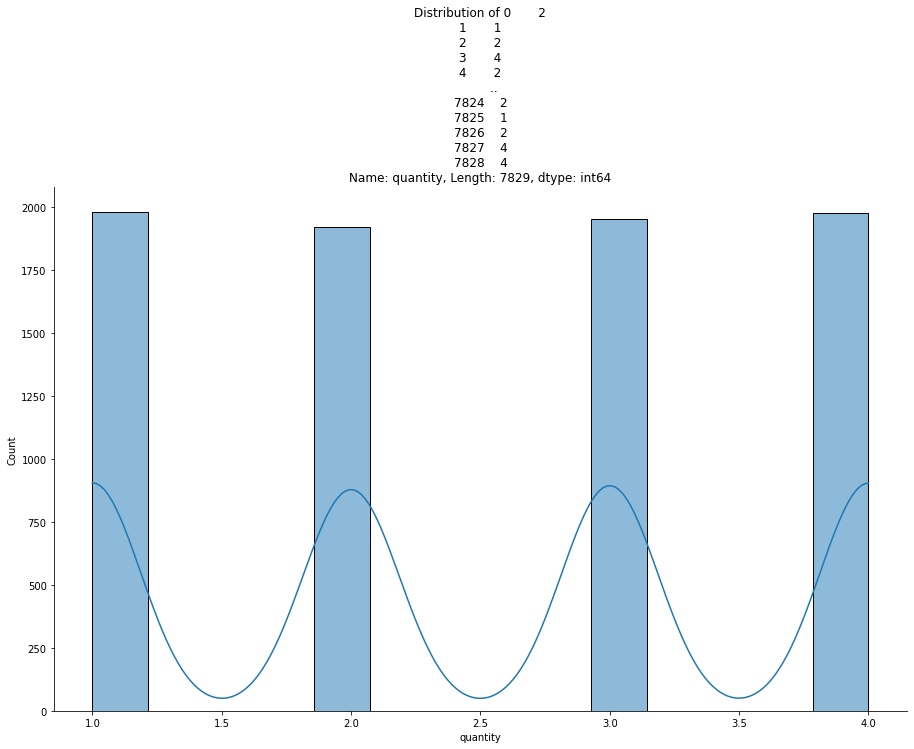

In [ ]:
plot_continuous_distribution(df, df.quantity)

ValueError: ignored

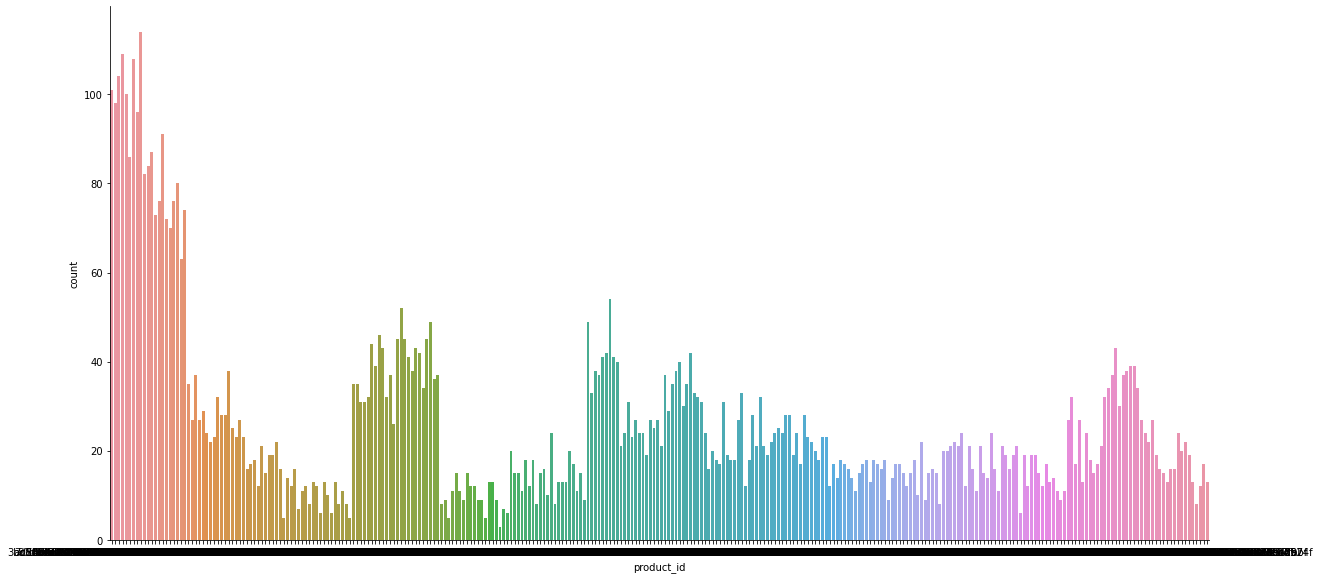

In [ ]:
plot_categorical_distribution(df , df.product)

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

